In [2]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [77]:
# Turno (T);
# Cambio de Formato Previo (CF);
# Duración de la Parada (DP);
# Sistema (S),
# Criticidad (C);
# Componente (CM)
# Tipo de falla (TF);
# Causa de Falla (CUF);
# Mantenimiento Preventivo (MP);
# Tiempo entre fallas (TEF)

model_1 = BayesianNetwork([('T','CF'), ('CF','DP'), ('S','C'),('C', 'DP'), ('S','CM'), ('CM','TF'), ('TF','CUF'), ('CUF','DP'), ('CUF','TEF'),('MP', 'TEF')])






In [78]:

# Definimos las distribuciones de probabilidad condicional (CPDs) para cada nodo
cpd_T = TabularCPD(variable='T', variable_card=3, values=[[0.32], [0.37], [0.31]])
cpd_S = TabularCPD(variable='S', variable_card=3, values=[[0.07], [0.36], [0.57]])
cpd_CF = TabularCPD(variable='CF', variable_card=2, values=[[1, 0.96, 0.98], [0, 0.04, 0.02]], evidence=['T'], evidence_card=[3])
cpd_C = TabularCPD(variable='C', variable_card=3, values=[[0.36, 0.28, 0.25], [0.45, 0.61,  0.66], [0.18, 0.11,  0.09]], evidence=['S'], evidence_card=[3])
cpd_CM = TabularCPD(variable='CM', variable_card=4, values=[[0.19, 0.15, 0.04], [0.45, 0.65, 0.09], [0, 0.2,  0], [0.36, 0, 0.87]], evidence=['S'], evidence_card=[3])
cpd_TF = TabularCPD(variable='TF', variable_card=3, values=[[0, 0.35, 0.09, 0.52], [0.46, 0.52, 0.45, 0.29], [0.54, 0.13,0.45, 0.19]], evidence=['CM'], evidence_card=[4])
cpd_CUF = TabularCPD(variable='CUF', variable_card=4, values=[[0.55, 0.29, 0.42], [0.1, 0.17, 0.06], [0.17, 0.19, 0.18], [0.18, 0.35, 0.34]], evidence=['TF'], evidence_card=[3])
cpd_MP = TabularCPD(variable='MP', variable_card=2, values=[[0.03], [0.97]])
cpd_TEF = TabularCPD(variable='TEF', variable_card=3, values=[[0.30, 0.50, 0.56, 0.33, 0, 1,0,1], [0.41, 0.44, 0.24, 0.45, 0, 0,1,0], [0.29, 0.06, 0.20, 0.22, 1, 0,0,0]], evidence=['MP','CUF'], evidence_card=[2,4])

cpd_DP = TabularCPD(variable='DP', variable_card=4,
                    values=[
                          [0.33, 0.43, 0.44, 0.30, 0.34, 0.56, 0.53, 0.24, 0.38, 0.00, 0.00, 0.50, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
                          [0.00, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                          [0.00, 0.00, 0.11, 0.00, 0.05, 0.00, 0.13, 0.14, 0.13, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                          [0.67, 0.57, 0.44, 0.70, 0.59, 0.44, 0.33, 0.62, 0.50, 1.00, 1.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
                        ], evidence=['CF','CUF','C'], evidence_card=[2, 4,3])






In [79]:
model_1.add_cpds(cpd_T, cpd_S, cpd_CF, cpd_C, cpd_CM, cpd_TF, cpd_CUF, cpd_MP, cpd_TEF, cpd_DP )

In [80]:
model_1.check_model()

True

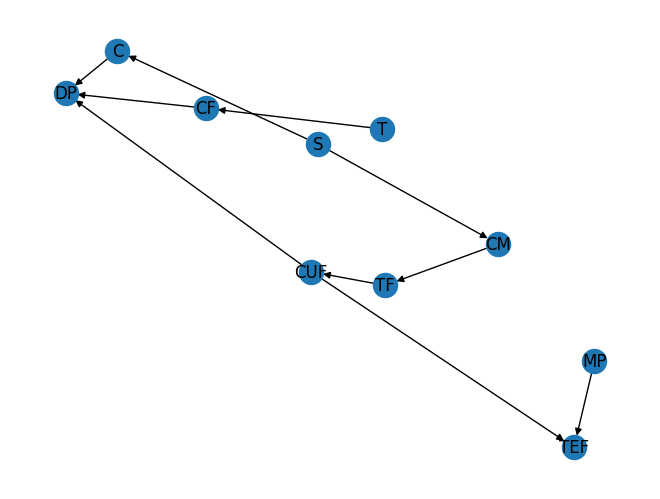

In [81]:
import networkx as nx
import pylab as plt

nx_graph = nx.DiGraph(model_1.edges())
nx.draw(nx_graph, with_labels=True)
plt.show()

In [84]:
print(cpd_T)
print(cpd_S)
print(cpd_CF)
print(cpd_C)
print(cpd_CM)
print(cpd_TF)
print(cpd_CUF)
print(cpd_MP)
print(cpd_TEF)
print(cpd_DP)

+------+------+
| T(0) | 0.32 |
+------+------+
| T(1) | 0.37 |
+------+------+
| T(2) | 0.31 |
+------+------+
+------+------+
| S(0) | 0.07 |
+------+------+
| S(1) | 0.36 |
+------+------+
| S(2) | 0.57 |
+------+------+
+-------+------+------+------+
| T     | T(0) | T(1) | T(2) |
+-------+------+------+------+
| CF(0) | 1.0  | 0.96 | 0.98 |
+-------+------+------+------+
| CF(1) | 0.0  | 0.04 | 0.02 |
+-------+------+------+------+
+------+------+------+------+
| S    | S(0) | S(1) | S(2) |
+------+------+------+------+
| C(0) | 0.36 | 0.28 | 0.25 |
+------+------+------+------+
| C(1) | 0.45 | 0.61 | 0.66 |
+------+------+------+------+
| C(2) | 0.18 | 0.11 | 0.09 |
+------+------+------+------+
+-------+------+------+------+
| S     | S(0) | S(1) | S(2) |
+-------+------+------+------+
| CM(0) | 0.19 | 0.15 | 0.04 |
+-------+------+------+------+
| CM(1) | 0.45 | 0.65 | 0.09 |
+-------+------+------+------+
| CM(2) | 0.0  | 0.2  | 0.0  |
+-------+------+------+------+
| CM(3) | 

### Inferencias

In [85]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model_1)

1. ¿Cuál es la probabilidad de ocurrencia de parada corta dado una criticidad media, de sistema de calentamiento y que la causa de la falla haya sido por desgaste y capacidad?.

In [91]:
inferir_p1 = infer.query(["DP"], evidence={"C": 1, 'S':0, "CUF":0})
print(inferir_p1)
print('La probabilidad es: ',inferir_p1.values[0]*100," %")

+-------+-----------+
| DP    |   phi(DP) |
+=======+===========+
| DP(0) |    0.4420 |
+-------+-----------+
| DP(1) |    0.0000 |
+-------+-----------+
| DP(2) |    0.0000 |
+-------+-----------+
| DP(3) |    0.5580 |
+-------+-----------+
La probabilidad es:  44.197  %


2. ¿Cuál es la probabilidad de ocurrencia de parada moderada dado una falla de tipo Mecánica y ajuste, que el componente haya sido de movimiento y que haya sido en el primer turno?.

In [95]:
inferir_p2 = infer.query(["DP"], evidence={"TF": 1, 'CM':2, "T":0})
print(inferir_p2)
print('La probabilidad es: ',inferir_p2.values[2]*100," %")

+-------+-----------+
| DP    |   phi(DP) |
+=======+===========+
| DP(0) |    0.2603 |
+-------+-----------+
| DP(1) |    0.0021 |
+-------+-----------+
| DP(2) |    0.0442 |
+-------+-----------+
| DP(3) |    0.6934 |
+-------+-----------+
La probabilidad es:  4.420638049627861  %


3. ¿Cuál es la probabilidad de ocurrencia de parada extensa dado que se cambió el formato de producción, en la tarde, en un sistema de calentamiento, y criticidad baja?.

In [96]:
inferir_p3 = infer.query(["DP"], evidence={"CF": 1, 'T':1, "S":0, 'C':2})
print(inferir_p3)
print('La probabilidad es: ',inferir_p3.values[1]*100," %")

+-------+-----------+
| DP    |   phi(DP) |
+=======+===========+
| DP(0) |    1.0000 |
+-------+-----------+
| DP(1) |    0.0000 |
+-------+-----------+
| DP(2) |    0.0000 |
+-------+-----------+
| DP(3) |    0.0000 |
+-------+-----------+
La probabilidad es:  0.0  %


4. ¿Cuál es la probabilidad de tener un tiempo entre fallas cortas dado que la causa era de diseño y fabricación, no tuvo mantenimiento preventivo previo y el tipo de falla sea de calentamiento?

In [94]:
inferir_p4 = infer.query(["TEF"], evidence={"CUF": 2, 'MP':1, "TF":2})
print(inferir_p4)
print('La probabilidad es: ',inferir_p4.values[0]*100," %")

+--------+------------+
| TEF    |   phi(TEF) |
+========+============+
| TEF(0) |     0.0000 |
+--------+------------+
| TEF(1) |     1.0000 |
+--------+------------+
| TEF(2) |     0.0000 |
+--------+------------+
La probabilidad es:  0.0  %


5. ¿Cuál es la probabilidad de tener un tiempo entre fallas media dado que el sistema sea de procesos térmico, el tipo de falla fue de eléctricas y no hubo mantenimiento preventivo previo?

In [97]:
inferir_p5 = infer.query(["TEF"], evidence={"S": 2, 'TF':0, "MP":1})
print(inferir_p5)
print('La probabilidad es: ',inferir_p5.values[1]*100," %")

+--------+------------+
| TEF    |   phi(TEF) |
+========+============+
| TEF(0) |     0.2800 |
+--------+------------+
| TEF(1) |     0.1700 |
+--------+------------+
| TEF(2) |     0.5500 |
+--------+------------+
La probabilidad es:  17.0  %


6. ¿Cuál es la probabilidad de tener un tiempo entre fallas largas dado que no tuvo mantenimiento preventivo previo, la causa de la falla es por desgaste y capacidad de un sistema mecánico eléctrico?

In [98]:
inferir_p6 = infer.query(["TEF"], evidence={"S": 1, 'CUF':0, "MP":1})
print(inferir_p6)
print('La probabilidad es: ',inferir_p6.values[2]*100," %")

+--------+------------+
| TEF    |   phi(TEF) |
+========+============+
| TEF(0) |     0.0000 |
+--------+------------+
| TEF(1) |     0.0000 |
+--------+------------+
| TEF(2) |     1.0000 |
+--------+------------+
La probabilidad es:  100.0  %


7. ¿Cuál es la probabilidad de que una falla de tipo mecánicas y de ajuste (atascamiento) ocurra en el turno 3 sin conocer la criticidad del subsistema?

In [99]:
inferir_p7 = infer.query(["TF"], evidence={'T':2})
print(inferir_p7)
print('La probabilidad es: ',inferir_p7.values[1]*100," %")

+-------+-----------+
| TF    |   phi(TF) |
+=======+===========+
| TF(0) |    0.3886 |
+-------+-----------+
| TF(1) |    0.3900 |
+-------+-----------+
| TF(2) |    0.2214 |
+-------+-----------+
La probabilidad es:  38.998178688655834  %


8. ¿Cuál es la probabilidad de que un evento de falla ocurra en el turno 2 si la última intervención de mantenimiento preventivo fue realizada y el sistema es de calentamiento?

In [100]:
inferir_p8 = infer.query(["TF"], evidence={'T':1,'MP':0,'S':0})
print(inferir_p8)
print('La probabilidad es: ',inferir_p8.values[0]*100," %")

+-------+-----------+
| TF    |   phi(TF) |
+=======+===========+
| TF(0) |    0.3447 |
+-------+-----------+
| TF(1) |    0.4258 |
+-------+-----------+
| TF(2) |    0.2295 |
+-------+-----------+
La probabilidad es:  34.47  %


9. ¿Cuál es la probabilidad de que una falla por deterioro (sobrecalentamiento) ocurra en un componente térmico si el sistema es de proceso térmico y la criticidad es alta?


In [101]:
inferir_p9 = infer.query(["TF"], evidence={'CM':3,'C':2,'CM':2})
print(inferir_p9)
print('La probabilidad es: ',inferir_p9.values[2]*100," %")

+-------+-----------+
| TF    |   phi(TF) |
+=======+===========+
| TF(0) |    0.0909 |
+-------+-----------+
| TF(1) |    0.4545 |
+-------+-----------+
| TF(2) |    0.4545 |
+-------+-----------+
La probabilidad es:  45.45454545454546  %
